<a href="https://colab.research.google.com/github/zcohen949/Astron-1221/blob/main/TransitMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # imports numpy libary to use for numerical calculations
import matplotlib.pyplot as plt # imports pyplot module from matplotlib library to create plots and graphs
import astropy.units as u # imports a Python package to call certain units
import astropy.constants as ac # imports a Python package to call the value of certain constants

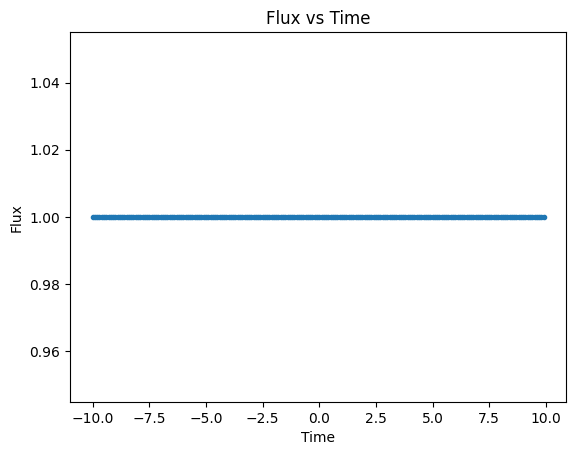

In [2]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # sets a time array as the x axis with a window between -10 and 10 hours
flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # creates an array for the flux using the dimensions of the time array; and sets each element to 1
plt.plot(time_arr, flux_arr, linestyle ="--", marker =".") # creates a plot with time array as x axis, flux array as y axis, and stylizes the plot
plt.title("Flux vs Time") # makes a title for the plot
plt.xlabel("Time") # makes an x label for the plot
plt.ylabel("Flux") # makes an y label for the plot
plt.show() # displays the plot below

In [3]:
tau = 2.0 * u.hour # creates a variable called tau and makes it be 2 hours, which will act as the total interval of time for the event
t_0 = 1.0 * u.hour # creates a variable called t_0 and makes it be 1 hour, which will act as the midpoint of the event
time_start = t_0 - tau / 2 # sets the starting time of the event
time_end = t_0 + tau / 2 # sets the ending point of the event
print(time_start, time_end) # displays the time_start and time_end values

0.0 h 2.0 h


In [4]:
for i in range(len(time_arr)): # when i is inside the number of elements time_arr has, the code below is executed
  if i < 10: # conditional statement that checks if i is less then 10, and if this is true it executes the code below
    print("index -", i, "value = ", time_arr[i]) # prints the value of i and the value of the time_arr for each loop

index - 0 value =  -10.0 h
index - 1 value =  -9.9 h
index - 2 value =  -9.8 h
index - 3 value =  -9.700000000000001 h
index - 4 value =  -9.600000000000001 h
index - 5 value =  -9.500000000000002 h
index - 6 value =  -9.400000000000002 h
index - 7 value =  -9.300000000000002 h
index - 8 value =  -9.200000000000003 h
index - 9 value =  -9.100000000000003 h


In [5]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # creates ind as an array when time_arr is between time_start and time_end
print(time_arr[ind]) # prints time_arr at each value where ind exists

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


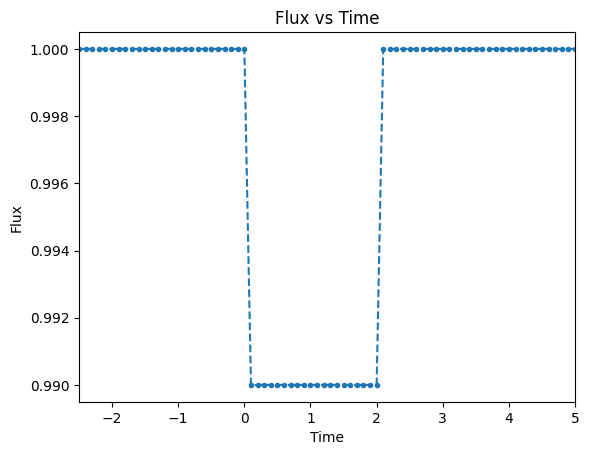

In [6]:
delta = 0.01 # creates variable delta and sets as 0.01, which represents the percentage by which the flux will be decreased
flux_arr[ind] = 1.0 - delta # creates a flux array between the start and end times, and brings down these values according to delta
plt.plot(time_arr, flux_arr, linestyle ="--", marker =".") # creates a stylized plot with time_arr as x axis, and flux_arr as y axis
plt.title("Flux vs Time") # names the plot
plt.xlabel("Time") # labels the x axis
plt.ylabel("Flux") # labels the y axis
plt.xlim(-2.5,5) # creates a range for the x axis
plt.show() # creates the plot below

In [23]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta): # creates a function with 4 arguments
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # creates an array for the flux using the dimensions of the time array; and sets each element to 1
  time_start = t_0 - tau / 2 # sets the starting time of the event
  time_end = t_0 + tau / 2 # sets the ending time of the event
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # creates ind as an array when time_arr is between time_start and time_end
  flux_arr[ind] = 1.0 - delta # creates a flux array between the start and end times, and brings down these values according to delta
  return flux_arr # reterns flux_arr

In [8]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # sets a time array as the x axis with a window between -10 and 10 hours
tau = 4.0 * u.hour # sets tau as 4 hours, which will act as the span of time of the event
t_0 = 2.0 * u.hour # sets t_0 as 2 hours, which will act as the midpoint/peak of the event
delta = 0.99 # sets delta to 0.99, which acts as the percentage of flux change during the event
flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta) # calls the function in the array flux_arr using now defined parameters/arguments

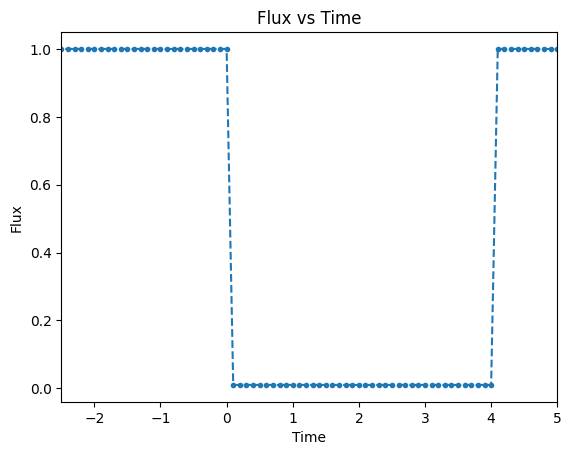

In [9]:
plt.plot(time_arr, flux_arr, linestyle ="--", marker =".") # creates a stylized plot with defined time_arr as x axis and defined flux_arr as y axis
plt.title("Flux vs Time")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.xlim(-2.5,5)
# plt.ylim(0,0.2)
plt.show()

In [10]:
from google.colab import files # imports files from google.colab
uploaded = files.upload() # creates a way to upload files

Saving plot.tbl to plot.tbl


In [11]:
import astropy.io.ascii # imports ascii module from astropy library which will be used for the uploaded data
dat = astropy.io.ascii.read("plot.tbl") # turns the uploaded data into a table and assigns to variable dat

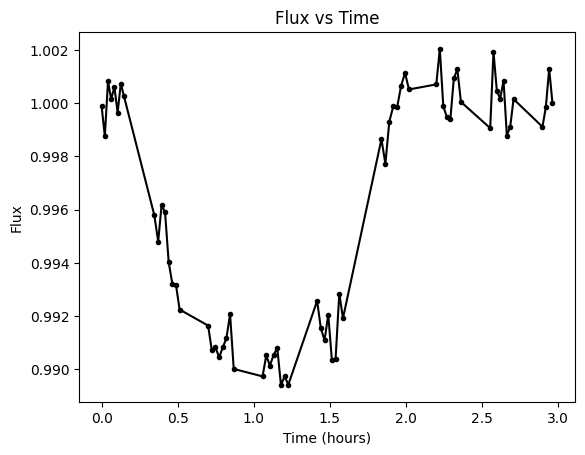

In [12]:
time_obs = dat["BJD"] # puts the data column BJD under the variable name time_obs
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # changes time_obs to show the difference between initial and event flux, and also changes the time to be in hours
flux_obs = dat["Relative_Flux"] # puts the data in column Relative_Flux under the variable name flux_obs
plt.plot(time_obs, flux_obs, marker =".", color="black") # creates a stylized plot with the above data with time_arr as the x-axis and flux_arr as the y axis
plt.title("Flux vs Time") # names the graph
plt.xlabel("Time (hours)") # names the x axis
plt.ylabel("Flux") # names the y axis
plt.show() # shows the graph below

In [20]:
t_0 = 1.12 * u.hour # creates a variable called t_0 and makes it be 1.12 hour, which will act as the midpoint of the event
tau = 1.3 * u.hour # creates a variable called tau and makes it be 1.3 hours, which will act as the span of time during which the event occurs
delta = 0.0105 # creates a variable called delta and sets as 0.0105, which represents the percentage by which the flux will be decreased
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # calls the function in the array flux_model using defined parameters/arguments of time_obs, t_0, tau, and delta

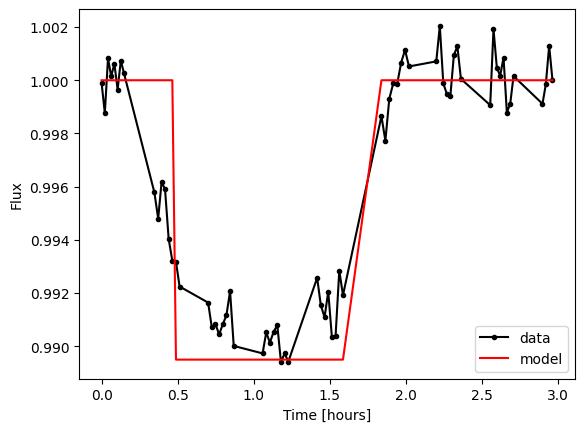

In [21]:
time_obs = dat["BJD"] # creates an array called time_obs by calling from uploaded data column BJD
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # changes time_obs to show the difference between initial and event flux, and also changes the time to be in hours
flux_obs = dat["Relative_Flux"] # creates an array called flux_obs by calling from uploaded data column Relative_Flux
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # creates a stylized plot of the observed flux from data using values from above
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # creates a stylized plot of the ideal model
plt.xlabel("Time [hours]") # labels the x axis
plt.ylabel("Flux") # labels the y axis
plt.legend() # creates a legend on the plot

plt.show() # shows the plot below

In [22]:
ind = np.where(time_obs > 1.95 * u.hour) # creates an array called ind of values when time_obs is more than 1.95 and converts these values to hours
error = np.std(flux_obs[ind]) # sets the variable error to be the standard deviation of the values defined above

degree_freedom = len(flux_obs[ind]) - 3 # finds the degrees of freedom of the data given the number of parameters set
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_freedom # finds the reduced chi squared from data
print(reduced_Chi2) # prints out the value of the reduced chi squared below

17.524018055142008


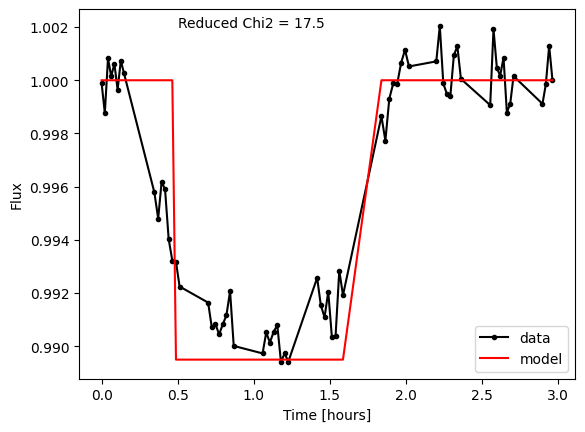

In [16]:
time_obs = dat["BJD"] # creates an array called time_obs by calling from uploaded data column BJD
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # changes time_obs to show the difference between initial and event flux, and also changes the time to be in hours
flux_obs = dat["Relative_Flux"] # creates an array called flux_obs by calling from uploaded data column Relative_Flux
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # creates a stylized plot of the observed flux from data using values from above
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # creates a stylized plot of the ideal model
plt.xlabel("Time [hours]") # labels the x axis
plt.ylabel("Flux") # labels the y axis
plt.legend() # makes a legend on the plot

degree_freedom = len(flux_obs[ind]) - 3 # finds the degrees of freedom of the data given the number of parameters set
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_freedom # finds the reduced chi squared from data
plt.annotate("Reduced Chi2 = {0:4.1f}".format(reduced_Chi2), xy=[0.5, 1.002]) # puts the value of the reduced chi squared on the plot formatted and in a specific location
plt.show() # shows this created plot below